<a href="https://colab.research.google.com/github/run-llama/llama_index/blob/main/docs/docs/examples/multi_modal/gpt4v_experiments_cot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GPT4-V Experiments with General, Specific questions and Chain Of Thought (COT) Prompting Technique.

GPT-4V has amazed us with its ability to analyze images and even generate website code from visuals.

This tutorial notebook investigates GPT-4V's proficiency in interpreting bar charts, scatter plots, and tables. We aim to assess whether specific questioning and chain of thought prompting can yield better responses compared to broader inquiries. Our demonstration seeks to determine if GPT-4V can exceed these known limitations with precise questioning and systematic reasoning techniques.

We observed in these experiments that asking specific questions, rather than general ones, yields better answers. Let's delve into these experiments.

NOTE: This tutorial notebook aims to inform the community about GPT-4V's performance, though the results might not be universally applicable. We strongly advise conducting tests with similar questions on your own dataset before drawing conclusions.

We have put to test following images from [Llama2](https://arxiv.org/pdf/2307.09288.pdf) and [MistralAI](https://arxiv.org/pdf/2310.06825.pdf) papers.

1. Violation percentage of safety with different LLMs across categories. (Llama2 paper)
2. Llama2 vs Mistral model performances across various NLP tasks.(Mistral paper)
2. Performances of different LLMs across various NLP tasks. (Llama2 paper)

Let's inspect each of these images now.

Let's start analyzing these images by following these steps for our questions:

1. General Question: Simply ask, "Analyze the image."
2. Specific Inquiry: Question the performance of a certain category or model in detail.
3. Chain of Thought Prompting: Use a step-by-step reasoning method to walk through the analysis.

These guidelines aim to test how different questioning techniques might improve the precision of the information we gather from the images.

In [ ]:
%pip install llama-index-multi-modal-llms-openai

In [ ]:
!pip install llama-index

In [ ]:
import os

OPENAI_API_KEY = "YOUR OPENAI API KEY"

os.environ["OPENAI_API_KEY"] = OPENAI_API_KEY

In [ ]:
from llama_index.core import SimpleDirectoryReader
from llama_index.multi_modal_llms.openai import OpenAIMultiModal

openai_mm_llm = OpenAIMultiModal(
    model="gpt-4o",
    api_key=OPENAI_API_KEY,
    max_new_tokens=500,
    temperature=0.0,
)

### Download Data

In [ ]:
!wget 'https://raw.githubusercontent.com/run-llama/llama_index/main/docs/docs/examples/data/gpt4_experiments/llama2_mistral.png' -O './llama2_mistral.png'
!wget 'https://raw.githubusercontent.com/run-llama/llama_index/main/docs/docs/examples/data/gpt4_experiments/llama2_model_analysis.pdf' -O './llama2_model_analysis.png'
!wget 'https://raw.githubusercontent.com/run-llama/llama_index/main/docs/docs/examples/data/gpt4_experiments/llama2_violations_charts.png' -O './llama2_violations_charts.png'

### Image1 - Violation percentage of safety with different LLMs across categories.

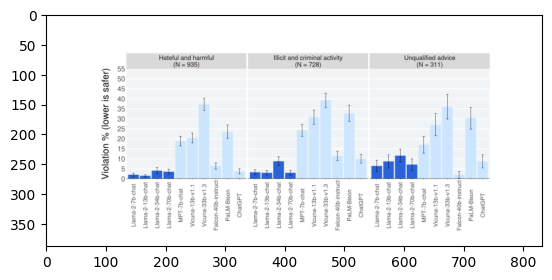

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("llama2_violations_charts.png")
plt.imshow(img)

In [ ]:
# put your local directory here
image_documents = SimpleDirectoryReader(
    input_files=["./llama2_violations_charts.png"]
).load_data()

#### General Question

In [ ]:
query = "Analyse the image"

response_gpt4v = openai_mm_llm.complete(
    prompt=query,
    image_documents=image_documents,
)

print(response_gpt4v)

The image you've provided is a bar chart displaying data grouped into three categories of online violations: hateful and harmful, illicit and criminal activity, and unqualified advice. Each of these categories has a number in parentheses, indicating the sample size of reported incidents for each type of violation (395, 728, and 311, respectively).

The x-axis of the chart specifies various social media platforms or services, such as "Video sharing", "Social networking", "Gaming", "Dating", "Forums & boards", "Commercial Websites", "Media sharing", "P2P/File sharing", "Wiki", and "Other". It appears to measure how often these categories of violations occur on each type of platform.

The y-axis measures the percentage of violations reported, ranging from 0% to 60%.

Each platform/service has three bars corresponding to the three violation categories, showing their respective percentages. The bars also have error bars, which typically represent the variability of the data, such as standar

#### Observation:

As you can see though the categories hateful and harmful, illicit and criminal activity, and unqualified advice but it hallicunated with x-axis values with -  "Video sharing", "Social networking", "Gaming", "Dating", "Forums & boards", "Commercial Websites", "Media sharing", "P2P/File sharing", "Wiki", and "Other".

#### Specific Questions

In [ ]:
query = "Compare Llama2 models vs Vicuna models across categories."

response_gpt4v = openai_mm_llm.complete(
    prompt=query,
    image_documents=image_documents,
)

print(response_gpt4v)

The provided image is a bar graph with three categories along the x-axis: Hateful and harmful; Illicit and criminal activity; Unqualified advice. It shows a comparison of two types of models – Llama2 and Vicuna – across these categories in terms of violation percentage, which is represented on the y-axis. For each category, there are multiple bars representing different subcategories or criteria.

The error bars on each bar indicate the confidence interval or variation in the percentage of violations.

From the graph, it looks like the Vicuna model generally has a lower violation percentage across all subcategories compared to the Llama2 model. This suggests that Vicuna may perform better in terms of producing fewer content violations in these areas.

However, without knowing the exact context or details of the models and the evaluation methodology, my interpretation is based solely on the visual data presented. If you have specific questions about each category or subcategory, or the 

#### Observation:

It answered wrong by saying Vicuna model generally has a lower violation percentage across all subcategories compared to the Llama2 model.

In [ ]:
query = "which model among llama2 and vicuna models does better in terms of violation percentages in Hateful and harmful category."

response_gpt4v = openai_mm_llm.complete(
    prompt=query,
    image_documents=image_documents,
)

print(response_gpt4v)

From the provided bar chart, we can analyze the violation percentage for both the Llama2 and Vicuna models in the "Hateful and harmful" category. To determine which model does better (i.e., has a lower violation percentage), you would look at the height of the bars corresponding to each model within that category.

In the "Hateful and harmful" category (which is the first group of bars on the left), you can compare the blue bar (representing Llama2) to the light blue bar (representing Vicuna). The model with the shorter bar in this category will have a lower violation percentage, and hence, better performance with respect to minimizing hateful and harmful content.

Please note that I cannot physically see the chart, so I'm unable to specify which model has the lower violation percentage. If you provide the actual percentages or describe the relative bar lengths for Llama2 and Vicuna in the "Hateful and harmful" category, I could then tell you which model performs better in that respect

#### Observation:

It failed to accurately capture the information, mistakenly identifying the light blue bar as representing Vicuna when, in fact, it is the light blue bar that represents Llama2.

Now let's inspect by giving more detailed information and ask the same question.

In [ ]:
query = """In the image provided to you depicts about the violation rate performance of various AI models across Hateful and harmful, Illicit and criminal activity, Unqualified advice categories.
           Hateful and harmful category is in first column. Bars with light blue are with Llama2 model and dark blue are with Vicuna models.
           With this information, Can you compare about Llama2 and Vicuna models in Hateful and harmful category."""

response_gpt4v = openai_mm_llm.complete(
    prompt=query,
    image_documents=image_documents,
)

print(response_gpt4v)

In the image you provided, which shows a bar graph for the violation rate performance of various AI models in the Hateful and harmful category, we can analyze the light blue bars that represent the Llama2 model and the dark blue bars that represent the Vicuna model.

Based on the visual information given, I can compare the two models within this category by observing the heights of the light blue bars (Llama2) versus the heights of the dark blue bars (Vicuna) for each subsection within the category. A lower bar indicates a lower violation rate, which could be interpreted as better performance in minimizing violations for the given criteria.

Since I can't give you the exact numbers or percentages, I would describe their relative performances. It appears that for some subsections, the Llama2 bars are shorter than the Vicuna bars, suggesting that the Llama2 model could have a lower violation rate in those areas. Conversely, in other subsections, the Vicuna bars might be shorter than the 

#### Observation:

It did answer the question correctly.

#### Chain of thought prompting

In [ ]:
query = """Based on the image provided. Follow the steps and answer the query - which model among llama2 and vicuna does better in terms of violation percentages in 'Hateful and harmful'.

Examine the Image: Look at the mentioned category in the query in the Image.

Identify Relevant Data: Note the violation percentages.

Evaluate: Compare if there is any comparison required as per the query.

Draw a Conclusion: Now draw the conclusion based on the whole data."""

response_gpt4v = openai_mm_llm.complete(
    prompt=query,
    image_documents=image_documents,
)

print(response_gpt4v)

Examine the Image: The image is a bar chart depicting violation percentages in three categories: "Hateful and harmful," "Illicit and criminal activity," and "Unqualified advice." Each category has two bars next to each other representing two models named "llama2" and "vicuna." 

Identify Relevant Data: We are specifically interested in the "Hateful and harmful" category, which is the first set of bars on the left. The two bars indicate the violation percentages for "llama2" and "vicuna."

Evaluate: By visually inspecting the bar corresponding to "Hateful and harmful," we see that the blue bar (indicating "llama2") has a lower percentage than the red bar (indicating "vicuna"). The exact percentages are not clear, but we can discern the relative performance between the two.

Draw a Conclusion: From the data visible, "llama2" has a lower violation percentage than "vicuna" in the "Hateful and harmful" category, thereby doing better in that respect according to the given image.


#### Observation:

With chain of thought prompting it did hallicunate with bar colours but answered correctly saying Llama2 has lower violation compared to vicuna in Hateful and harmful though for a section Llama2 has higher violation compared to vicuna.

### Image2 - Llama2 vs Mistral model performances across various NLP tasks.

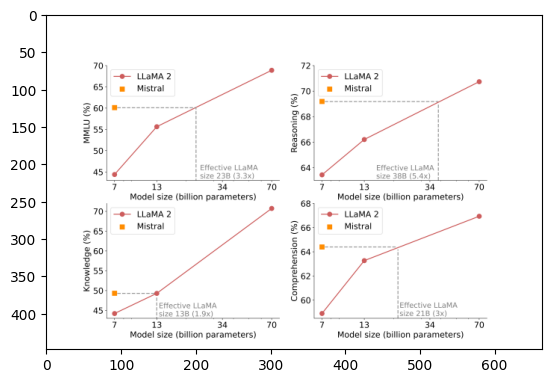

In [ ]:
img = Image.open("llama2_mistral.png")
plt.imshow(img)

In [ ]:
image_documents = SimpleDirectoryReader(
    input_files=["./llama2_mistral.png"]
).load_data()

#### General Question

In [ ]:
query = "Analyse the image"

response_gpt4v = openai_mm_llm.complete(
    prompt=query,
    image_documents=image_documents,
)

print(response_gpt4v)

The image appears to be a set of four line graphs that compare the performance of different natural language processing (NLP) models across four different metrics: Natural Language Understanding (NLU), Reasoning, Knowledge, and Commonsense. The models compared are LLaMA 2, LLaMA 13B, Mistral, and GPT-3.

Each graph plots the performance metric (on the y-axis) against the model size measured in billions of effective parameters (on the x-axis). In general, these plots demonstrate that as the model size increases, the performance on each metric improves.

Here are specific observations for each graph:

1. Natural Language Understanding (Top left): All models show an increase in NLU performance as the model size increases. Mistral is depicted as the highest-performing model at each size benchmark.

2. Reasoning (Top right): Again, larger models perform better on reasoning tasks, with Mistral consistently outperforming the other models mentioned.

3. Knowledge (Bottom left): Similar to the 

#### Observation:
It did answer the query but hallicunated with NLU task which is MMLU task and assumed Mistral is available across all different model parameters.

#### Specific Questions

In [ ]:
query = "How well does mistral model compared to llama2 model?"

response_gpt4v = openai_mm_llm.complete(
    prompt=query,
    image_documents=image_documents,
)

print(response_gpt4v)

The image you've provided contains four graphs, each plotting different performance metrics for evaluating language models. It compares two models: Mistral and LLaMA2 across four different aspects—MMLU (Multi-tasking multiple-choice), Reasoning, Knowledge, and Commonsense. In each graph, the performance metric is plotted on the y-axis while the effective model size in billion parameters is plotted on the x-axis. Here's a summary based on the trends observed in the graphs:

1. **MMLU (Top Left Graph)**: LLaMA2 shows a steeper performance curve as the model size increases, starting at around 61% for the smallest size and reaching upwards of 66% for the largest model. Mistral also shows performance gains with model size but plateaus earlier, reaching a level just shy of 62%.

2. **Reasoning (Top Right Graph)**: In the reasoning task, LLaMA2 again has a steeper improvement curve, starting from about 61% and surpassing 72% for the largest model. Mistral, while improving, seems to plateau ne

#### Observation:
Incorrect answer and percentages are not accurate enough and again assumed mistral is available across all parameter models.

In [ ]:
query = "Assuming mistral is available in 7B series. How well does mistral model compared to llama2 model?"

response_gpt4v = openai_mm_llm.complete(
    prompt=query,
    image_documents=image_documents,
)

print(response_gpt4v)

This image appears to be a set of four graphs, each comparing the performance of three different language models on various tasks: Mistral, LLaMA-2, and a hypothetical "Size 7B" model. The graphs are labeled with task-specific performance metrics: "MLM U", "Reasoning", "Knowledge", and "Commonsense".

The x-axes on the graphs represent model size in terms of the number of parameters, with three points that likely correspond to the sizes of the models being compared. The y-axes represent performance as a percentage, which could mean accuracy, precision, recall, or another relevant performance metric depending on the specific task.

The graphs appear to show that Mistral performs better than LLaMA-2 and the Size 7B model across all metrics. This indicates that within the context of these measurements and tasks, Mistral is a stronger model. The exact nature of the tasks or what "MLM U", "Reasoning", "Knowledge", and "Commonsense" specifically refer to are not detailed in the image, but th

#### Observation:
Now with giving the detail that mistral is available in 7B series, it is able to answer correctly.

### Chain of thought prompting.

In [ ]:
query = """Based on the image provided. Follow the steps and answer the query - Assuming mistral is available in 7B series. How well does mistral model compared to llama2 model?.

Examine the Image: Look at the mentioned category in the query in the Image.

Identify Relevant Data: Note the respective percentages.

Evaluate: Compare if there is any comparison required as per the query.

Draw a Conclusion: Now draw the conclusion based on the whole data."""

response_gpt4v = openai_mm_llm.complete(
    prompt=query,
    image_documents=image_documents,
)

print(response_gpt4v)

Examine the Image: The image contains four graphs, each graph compares the performance of three different models—Llama 2, Mistral, and an unnamed third model—across different metrics: mAP@L (mean Average Precision at L), Reason@L (presumably a reasoning score at L), Knowledge@L, and Comprehension@L. Each graph shows performance as a function of model size (in terms of billion parameters).

Identify Relevant Data: We need to focus on the Mistral and Llama 2 models across all four graphs to extract the relevant data.

For mAP@L:
- Llama 2 reaches above 65% when reaching 70 billion parameters.
- Mistral starts at around 5 billion parameters with about 48% and reaches almost 65% by the time it gets to 34 billion parameters.

For Reason@L:
- Llama 2 reaches about 68% when reaching 70 billion parameters.
- Mistral starts at around 5 billion parameters with about 52% and reaches almost 68% by the time it gets to 34 billion parameters.

For Knowledge@L:
- Llama 2 starts at about 45% with 1.3 b

#### Observation:

There is hallicunation with number of model parameters and percentage points though the final conclusion is partially correct.

### Image3 - Performances of different LLMs across various NLP tasks.

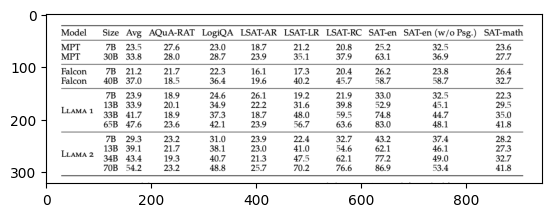

In [ ]:
img = Image.open("llm_analysis.png")
plt.imshow(img)

In [ ]:
image_documents = SimpleDirectoryReader(
    input_files=["./llama2_model_analysis.png"]
).load_data()

#### General Question

In [ ]:
query = "Analyse the image"

response_gpt4v = openai_mm_llm.complete(
    prompt=query,
    image_documents=image_documents,
)

print(response_gpt4v)

The image appears to be a table containing numerical data, which seems to be a comparative analysis of various models across multiple parameters or tests. Each row represents a different model or configuration as indicated by names such as "MPT" and "Falcon" followed by a size specification like "70B," "7B," or some other parameter. The columns are labeled with test names or evaluation metrics, such as "Size," "Avg," "AQuA-RAT," "LogiQA," "L-SAT-AR," "L-SAT-IC," "L-SAT-RC," "SAT-en (w/o Psg.)," and "SAT-math."

The data is likely related to performance scores of these models on these tests, where higher numbers probably indicate better performance. Without additional context, it is difficult to provide a comprehensive analysis of this data, but it seems clear that it is intended to provide a performance comparison between different models on various tasks, possibly in the field of machine learning or artificial intelligence evaluations, where such models are typically assessed on reaso

#### Observation:

It did not analyse the image specifically but understood the overall data present in the image to some extent.

#### Specific Questions

In [ ]:
query = "which model has higher performance in SAT-en?"

response_gpt4v = openai_mm_llm.complete(
    prompt=query,
    image_documents=image_documents,
)

print(response_gpt4v)

In the table you've provided, the models are compared based on their performance on several benchmarks, including SAT-en (SAT Analogies, or "SAT" in the table). To determine which model has higher performance specifically on the SAT-en benchmark, you'll need to look at the corresponding column.

In the SAT-en column (second from the right), the two models with the highest scores are:

- LLaMA1 65B: with a score of 57.9
- LLaMA2 70B: with a score of 63.4

Between these two, the LLaMA2 model with 70 billion parameters shows the higher performance on the SAT-en benchmark with a score of 63.4.


#### Observation:

It did answer correctly but the numbers are being hallicunated.

In [ ]:
query = "which model has higher performance in SAT-en in 7B series models?"

response_gpt4v = openai_mm_llm.complete(
    prompt=query,
    image_documents=image_documents,
)

print(response_gpt4v)

The table you've provided shows performance benchmark scores for different model sizes across various AI models such as MPT, Falcon, and LLaMA on different tasks, such as Aqua-RAT, LogiQA, LastAR, SAT-en, and SAT-math.

For the SAT-en task specifically, you asked which model in the 7B series has the highest performance. To find out, we need to look at the column labeled "SAT-en (w/o Ps_8)." In the 7B series of models, here are the scores:

- MPT 7B: 37.1
- Falcon 7B: 37.3
- LLaMA 7B: 63.9
- Model2 7B: 37.4

The LLaMA 7B model outperforms the other 7B models on the SAT-en (w/o Ps_8) task with a score of 63.9.


#### Observation:

It did pick up the model names and answered correctly but recognised Llama series of models and values incorrectly.

### Chain of thought prompting.

In [ ]:
query = """Based on the image provided. Follow the steps and answer the query - which model has higher performance in SAT-en in 7B series models?

Examine the Image: Look at the mentioned category in the query in the Image.

Identify Relevant Data: Note the respective percentages.

Evaluate: Compare if there is any comparison required as per the query.

Draw a Conclusion: Now draw the conclusion based on the whole data."""

response_gpt4v = openai_mm_llm.complete(
    prompt=query,
    image_documents=image_documents,
)

print(response_gpt4v)

To answer which model has higher performance in SAT-en in the 7B series models, I will follow the provided steps:

Examine the Image: The categories in the image include model names and sizes, and performance scores for various tasks, including the SAT-en category.

Identify Relevant Data: The relevant data for the SAT-en category are the percentages listed under it for each 7B series model.

Evaluate: I will compare the SAT-en percentages of each 7B series model.

Draw a Conclusion: The SAT-en scores for the 7B series models are as follows:

- MPT 7B: 63.1%
- Falcon 7B: 73.4%
- LLama 1 7B: No data present for this category.
- LLama 2 7B: 76.6%

Based on the data, the LLama 2 7B model has the highest SAT-en performance among the 7B series models with a score of 76.6%.


#### Observation:

With chain of the thought prompting we are able to get right conclusion though it should be noted that it picked up wrong values.

## Final Observations:
Observations made based on experiments on Hallucination and correctness. 

(Please note that these observations are specific to the images used and cannot be generalized, as they vary depending on the images.)

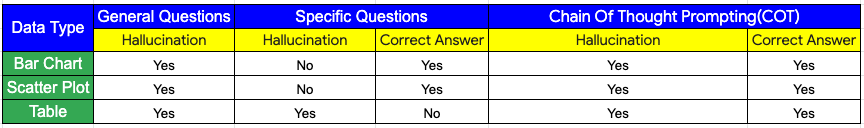

### Summary

In this tutorial notebook, we have showcased experiments ranging from general inquiries to systematic questions and chain of thought prompting techniques and observed Hallucination and correctness metrics.

However, it should be noted that the outputs from GPT-4V can be somewhat inconsistent, and the levels of hallucination are slightly elevated. Therefore, repeating the same experiment could result in different answers, particularly with generalized questions.